# Plot loop length distribution

The loop length distribution plot is similar to the contact distance plot, but has different information.
For example, we can explore the difference in the "loop extrusion" pattern
[[Fudenberg et al., Cell Reports, 2016]](https://doi.org/10.1016/j.celrep.2016.04.085)  by looking at the loop length difference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Specify samples to plot
samplelist = ['Control', 'siCTCF', 'siRad21']

The obtained loops are stored in the file `loops/SCALE/merged_loops.simple.bedpe`.
Read this file and show the loop length as a histogram.

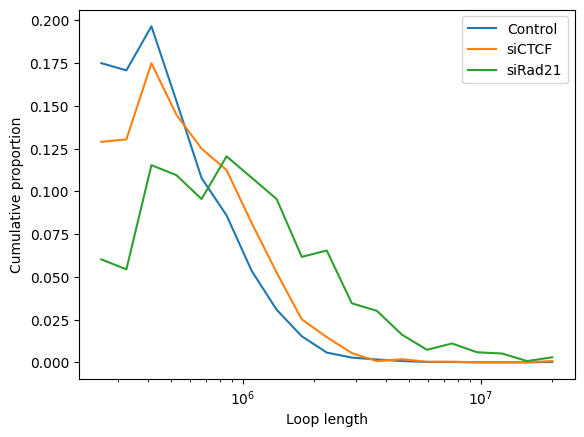

In [3]:
for sample in samplelist:
    path = "CustardPyResults_Hi-C/Juicer_hg38/" + sample + "/loops/SCALE/merged_loops.simple.bedpe"
    d = pd.read_csv(path, sep="\t", header=None)
    a = d[4] - d[2]
    hist, bins = np.histogram(a, bins=np.logspace(start=np.log10(200000), stop=np.log10(20000000), num=20))
    plt.plot(bins[1:], hist/hist.sum(),label=sample)

plt.xlabel("Loop length")
plt.ylabel("Cumulative proportion")
plt.xscale('log')
plt.legend()

Alternatively, you can show the distribution with the heatmap, same with the contact distance plot.

In [4]:
dfarray = []
for sample in samplelist:
    path = "CustardPyResults_Hi-C/Juicer_hg38/" + sample + "/loops/SCALE/merged_loops.simple.bedpe"
    d = pd.read_csv(path, sep="\t", header=None)
    a = d[4] - d[2]
    hist, bins = np.histogram(a, bins=np.logspace(start=np.log10(200000), stop=np.log10(20000000), num=20))
    df = pd.DataFrame(data=hist/hist.sum(), index=bins[1:], columns=[sample])
    dfarray.append(df)
    
dfarray = pd.concat(dfarray, axis=1).T
dfarray

,2.548550e+05,3.247553e+05,4.138276e+05,5.273302e+05,6.719637e+05,8.562665e+05,1.091119e+06,1.390386e+06,1.771734e+06,2.257676e+06,2.876900e+06,3.665961e+06,4.671443e+06,5.952703e+06,7.585380e+06,9.665860e+06,1.231696e+07,1.569520e+07,2.000000e+07
Control,0.175041,0.170808,0.196576,0.152770,0.107859,0.085956,0.053562,0.030738,0.015277,0.005706,0.002761,0.001657,0.000736,0.000184,0.000184,0.000000,0.000000,0.000000,0.000184
siCTCF,0.128997,0.130435,0.174991,0.144808,0.125045,0.112469,0.081567,0.052461,0.025153,0.014732,0.005390,0.000719,0.001797,0.000359,0.000359,0.000000,0.000000,0.000000,0.000719
siRad21,0.060250,0.054372,0.115356,0.109478,0.095518,0.120500,0.108009,0.095518,0.061719,0.065393,0.034533,0.030125,0.016165,0.007348,0.011021,0.005878,0.005143,0.000735,0.002939


[None, None, None, None, None, None]

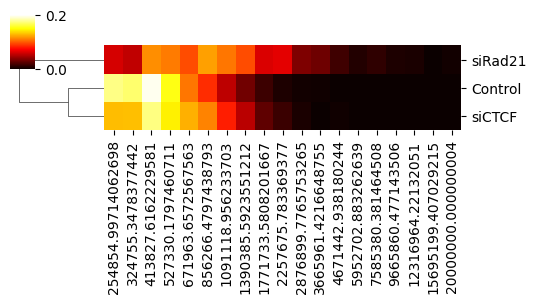

In [5]:
g = sns.clustermap(dfarray, cmap="hot", vmax=0.2, col_cluster=False, row_cluster=True, figsize=(5, 3))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0) 